In [1]:
import sys
sys.path.insert(0, "/Users/ylj/Personal/Programs/Github/USquareNet")

import matplotlib.pyplot as plt
from utils import *
import cv2
import numpy as np
from dataloader import DUTSDataset
from dataloader import Transforms
import random

ImportError: attempted relative import with no known parent package

In [ ]:
data_hyp= {
  'data_aug_shear': 0.0,
  'data_aug_translate': 0.1,
  'data_aug_degree': 5,
  "data_aug_perspective_p": 0.3, 
  'data_aug_prespective': 0.0,
  'data_aug_hsv_p': 1.0,
  'data_aug_hsv_hgain': 0.015,
  'data_aug_hsv_sgain': 0.7,
  'data_aug_hsv_vgain': 0.4,
  'data_aug_fliplr_p': 0.5,
  'data_aug_flipud_p': 0.0,
  'data_aug_fill_value': 114,
  'data_aug_cutout_p': 1, 
  "data_aug_blur_p": 0.1, 
  "data_aug_saturation_p": 0.1, 
  "data_aug_crop_p": 0.1, 
  "data_aug_brightness_p": 0.3}

In [ ]:
trans = Transforms(data_hyp)
dataset_kwargs = {"img_dir": "/Users/ylj/Personal/Programs/Dataset/SOD/DUTS-TR-Image/", 
                  "seg_dir": "/Users/ylj/Personal/Programs/Dataset/SOD/DUTS-TR-Mask/", 
                  "img_size": [448, 448], 
                  "enable_data_aug": True, 
                  "transform":trans
                }

dataset = DUTSDataset(**dataset_kwargs)

2022-11-04 15:18:14.755 | WARNING  | dataloader:_cache_images:134 - 
********************************************************************************
You are using cached images in RAM to accelerate training.
This requires large system RAM.
Make sure you have 200G+ RAM and 136G available disk space for training COCO.
********************************************************************************

2022-11-04 15:18:14.756 | WARNING  | dataloader:_cache_images:164 - You are using cached imgs! Make sure your dataset is not changed!!
Everytime the self.input_size is changed in your exp file, you need to delete
the cached data and re-generate them.

2022-11-04 15:18:14.757 | INFO     | dataloader:_cache_images:170 - Loading cached imgs...


cache_file path: /Users/ylj/Personal/Programs/Dataset/SOD/img_resized_cache.array


In [ ]:
img, seg, i = dataset[9]
print(img.shape, seg.shape)

(448, 448, 3) (448, 448, 1)


In [ ]:
def debug_plot(img, seg):
    fig, axes = plt.subplots(1, 3, figsize=[20, 20])
    axes[0].imshow(img[..., ::-1])
    axes[1].imshow(seg, cmap="gray")
    mask = np.zeros_like(img)
    mask[..., 0] = seg[..., 0]
    mask[..., 1] = seg[..., 0]
    mask[..., 2] = seg[..., 0]
    mask = mask / np.max(mask)
    masked_img = img.copy().astype(np.float32)
    masked_img *= mask
    masked_img = np.clip(masked_img, 0, 255).astype(np.uint8)
    axes[2].imshow(masked_img[..., ::-1])
    plt.show()

(313, 283, 3) (313, 283, 1)


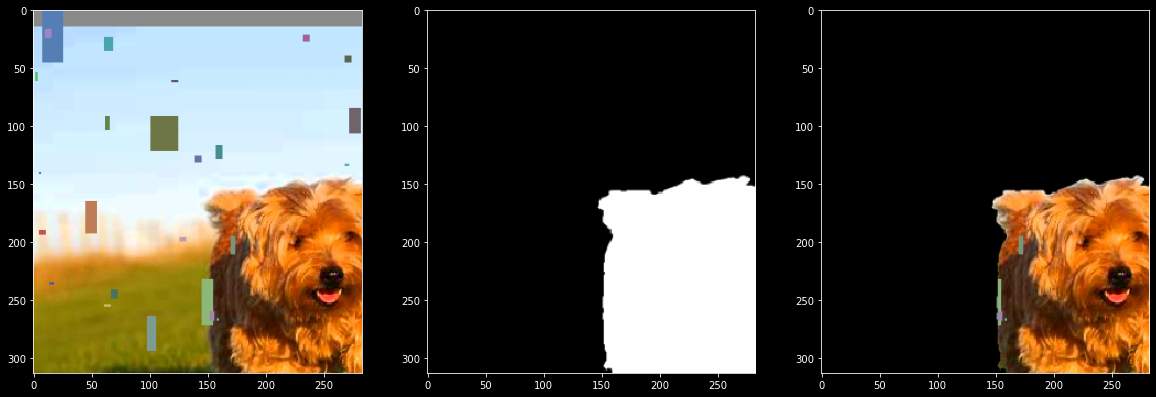

In [ ]:
img, seg, i = dataset[0]
print(img.shape, seg.shape)
debug_plot(img, seg)

In [ ]:
from dataloader import build_dataloader

kwargs = {"img_dir": "/Users/ylj/Personal/Programs/Dataset/SOD/DUTS-TR-Image/", 
          "seg_dir": "/Users/ylj/Personal/Programs/Dataset/SOD/DUTS-TR-Mask/", 
          "data_aug_hyp": data_hyp}

dataset, dataloader, prefetcher = build_dataloader(**kwargs)

2022-11-04 15:18:16.657 | WARNING  | dataloader:_cache_images:134 - 
********************************************************************************
You are using cached images in RAM to accelerate training.
This requires large system RAM.
Make sure you have 200G+ RAM and 136G available disk space for training COCO.
********************************************************************************

2022-11-04 15:18:16.658 | WARNING  | dataloader:_cache_images:164 - You are using cached imgs! Make sure your dataset is not changed!!
Everytime the self.input_size is changed in your exp file, you need to delete
the cached data and re-generate them.

2022-11-04 15:18:16.658 | INFO     | dataloader:_cache_images:170 - Loading cached imgs...


cache_file path: /Users/ylj/Personal/Programs/Dataset/SOD/img_resized_cache.array


torch.Size([16, 3, 448, 448]) torch.Size([16, 1, 448, 448]) 16


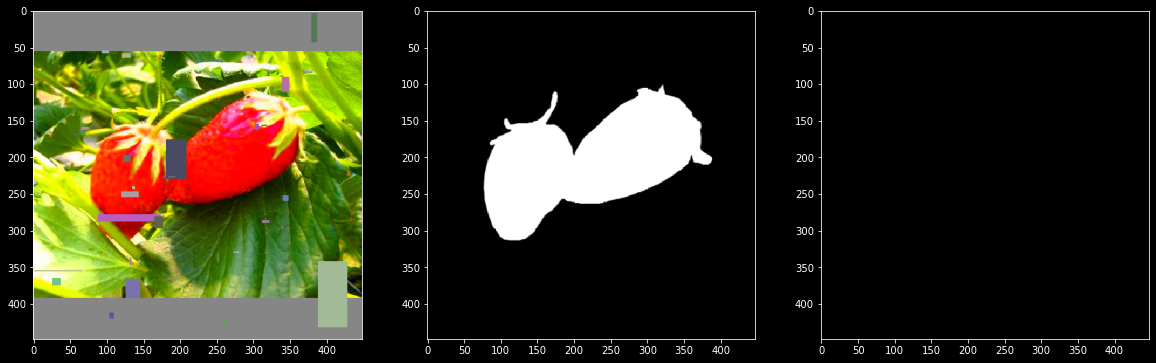

In [ ]:
data = next(dataloader)

# for data in dataloader:
imgs = data['img']
segs = data['seg']
ids = data['id']
print(imgs.shape, segs.shape, len(ids))
debug_plot(imgs.permute(0, 2, 3, 1)[0].numpy(), segs.permute(0, 2, 3, 1)[0].numpy())
# break

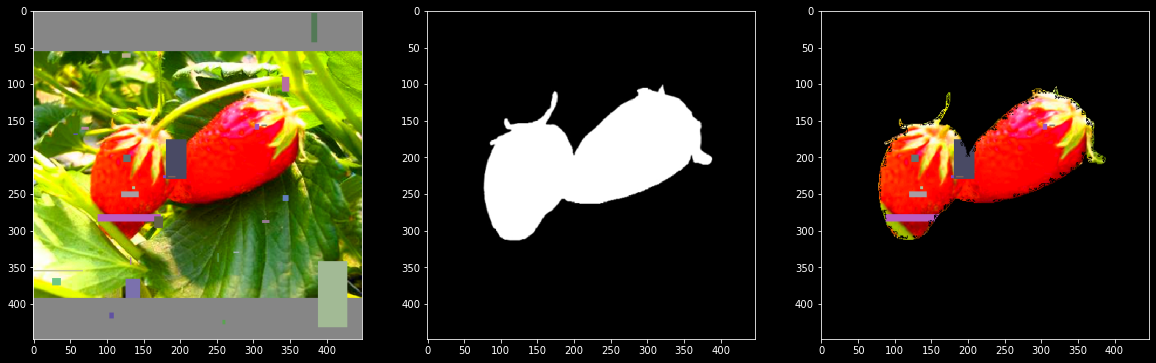

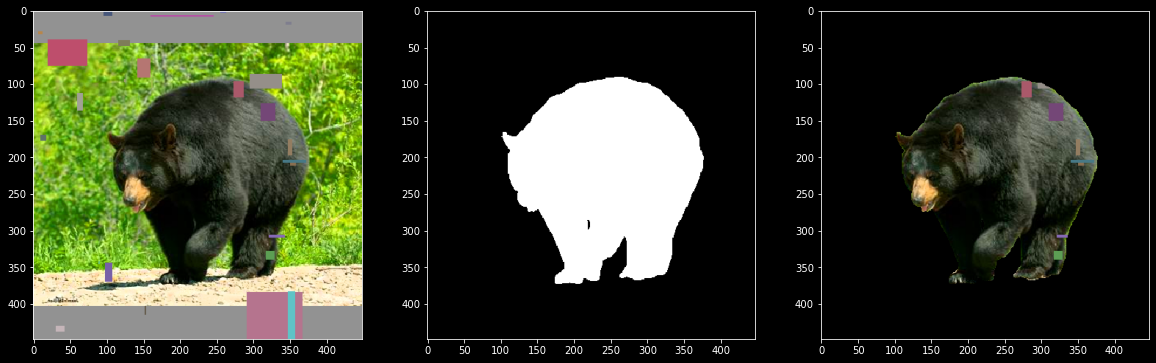

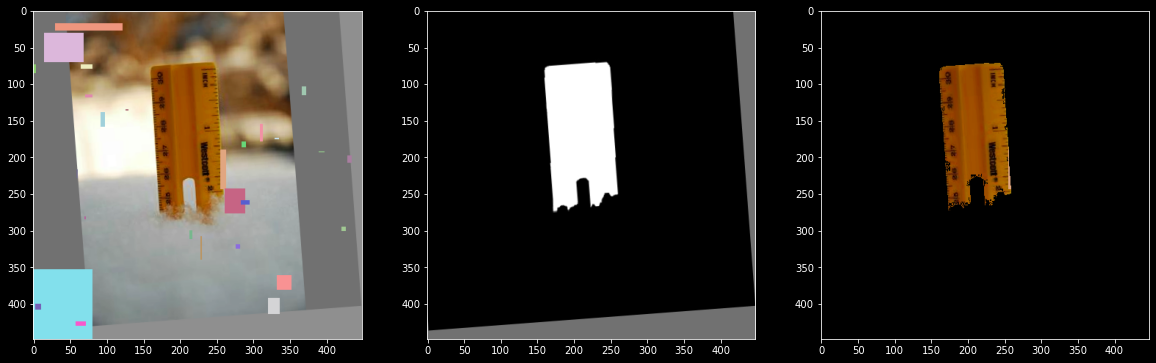

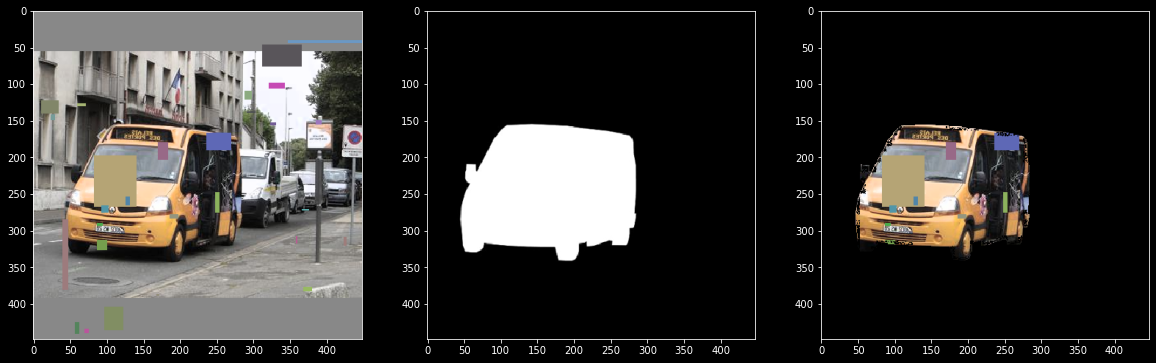

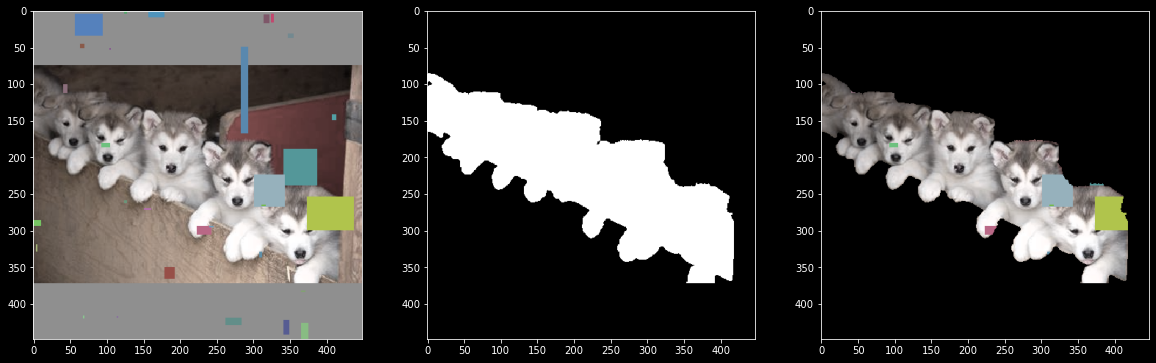

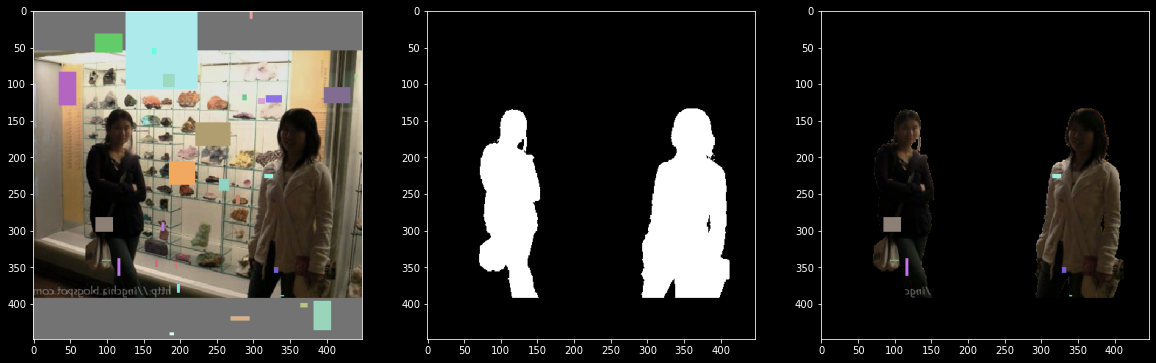

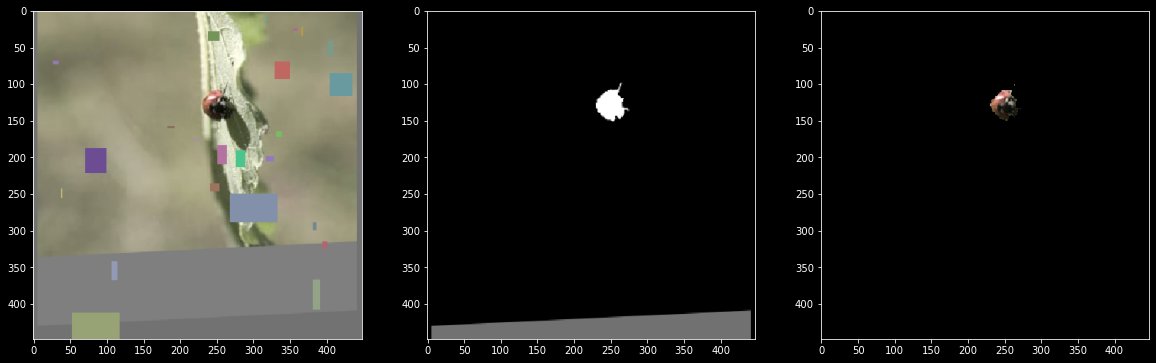

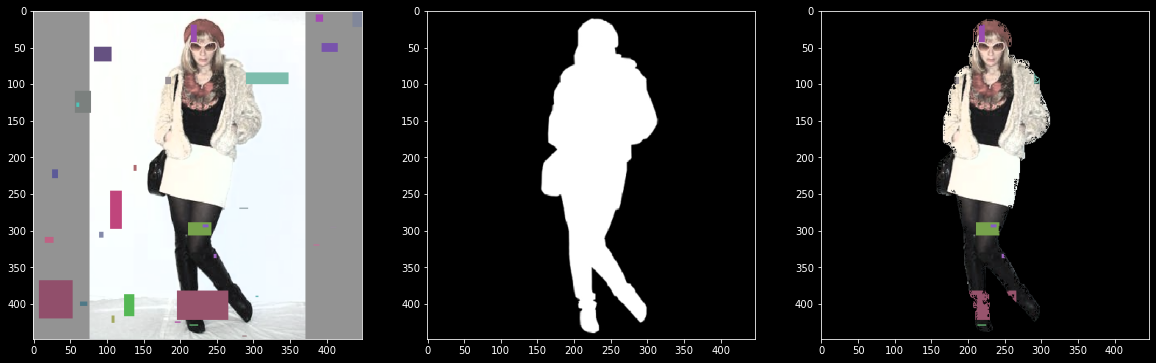

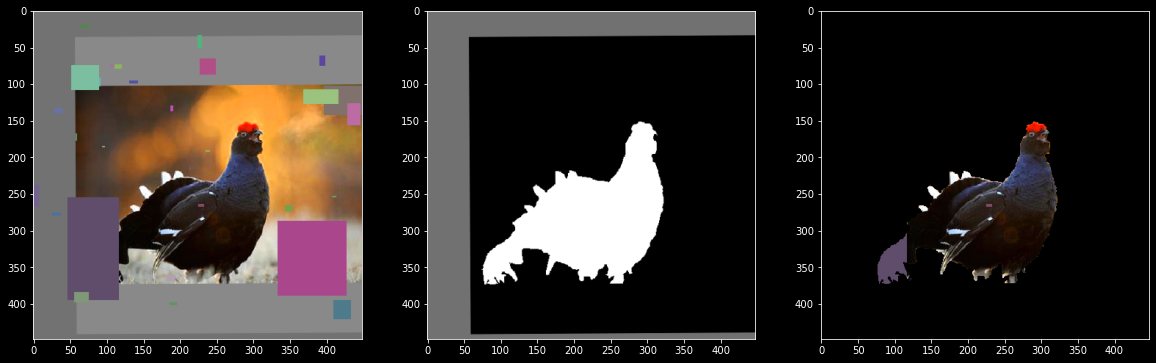

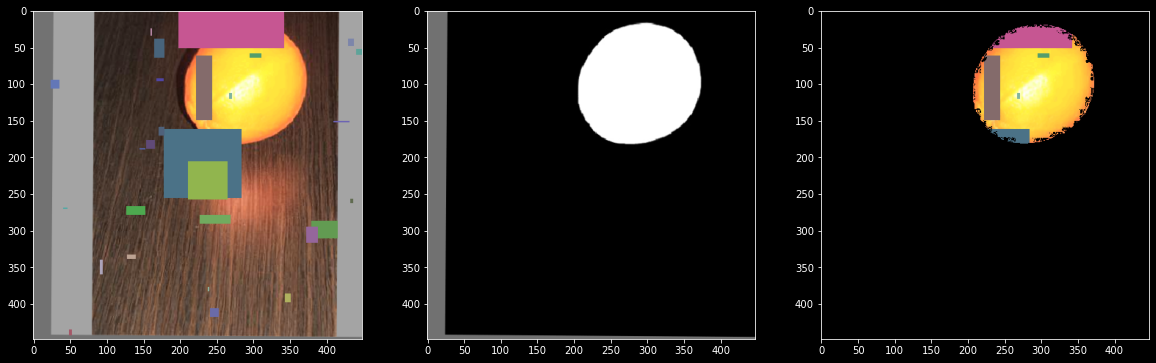

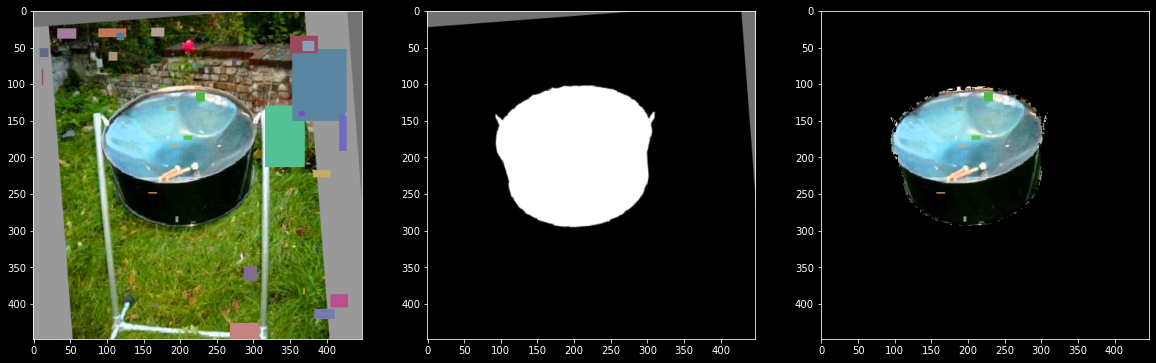

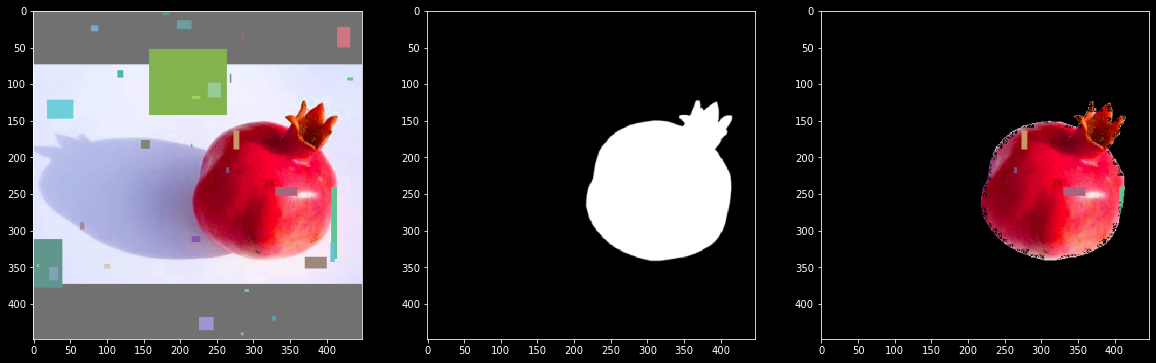

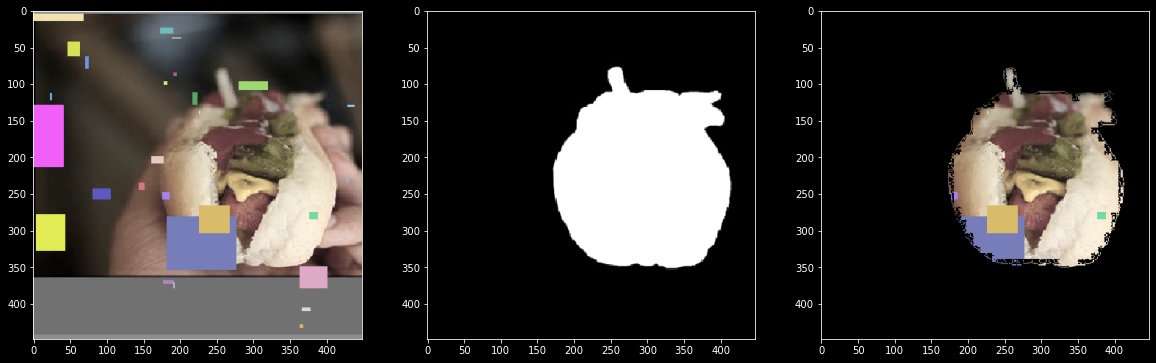

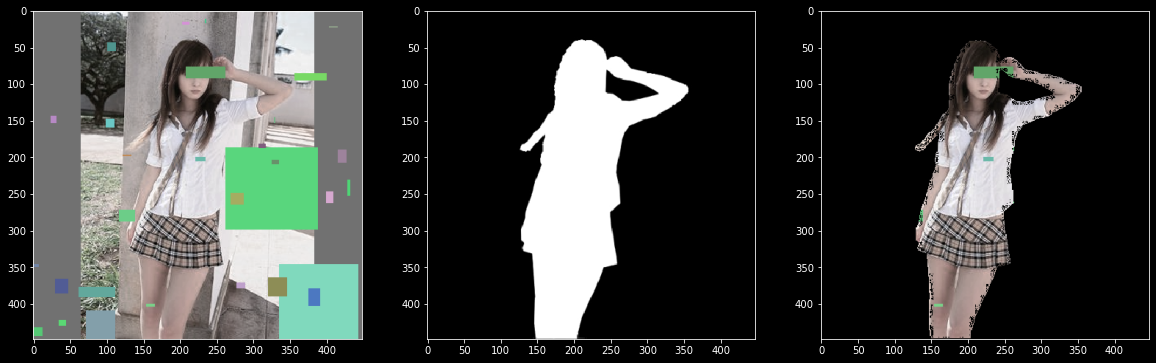

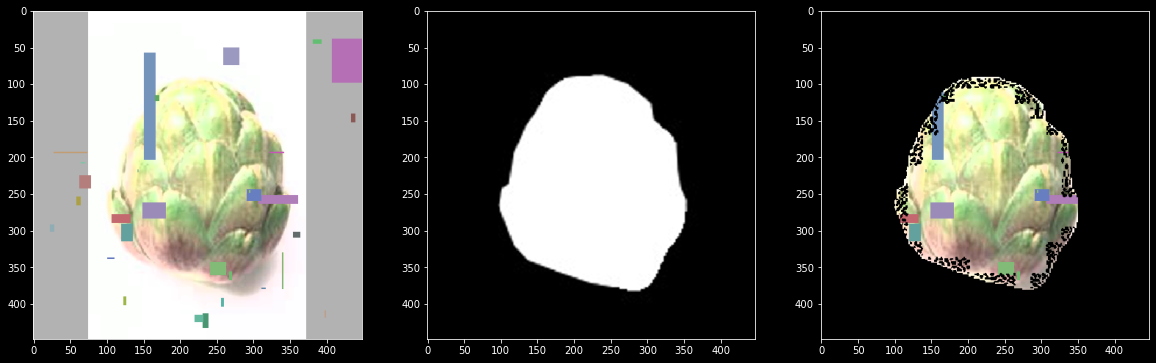

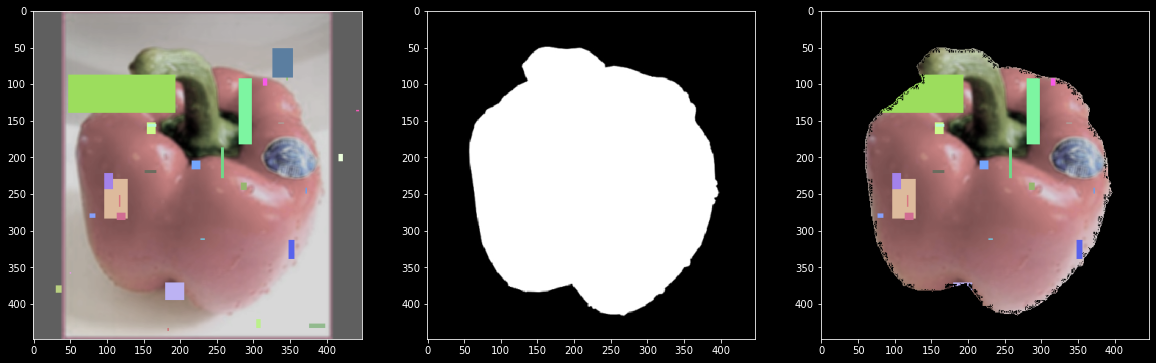

In [ ]:
i = random.randint(0, len(imgs))
imgs = imgs.permute(0, 2, 3, 1).numpy()
segs = segs.permute(0, 2, 3, 1).numpy()
for i in range(len(imgs)):
    img = imgs[i]
    img = img * 255
    img = np.clip(img, 0, 255).astype(np.uint8)
    seg = segs[i]
    debug_plot(img, seg)

In [15]:
import torch
pred_segs = torch.rand(4, 1, 256, 256)
pred_reshape = pred_segs.reshape(4, 1, 1, -1)
pred_segs = (pred_segs - ) / (torch.max(pred_reshape, dim=-1, keepdim=True)[0] - torch.min(pred_reshape, dim=-1, keepdim=True)[0])

In [13]:
torch.min(pred_reshape, dim=-1, keepdim=True)[0].shape

torch.Size([4, 1, 1, 1])